In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/A_Z Handwritten Data.csv')


In [ ]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [ ]:
df['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
classes = {i:chr(i+65) for i in range(26)}
classes

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [ ]:
y = df.values[:, 0]
x = df.values[:, 1:]

In [ ]:
x = np.reshape(x, (x.shape[0], 28, 28, 1))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
datagen_train = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
datagen_test = ImageDataGenerator(rescale=1./255)

In [ ]:

data_train = datagen_train.flow(x_train, y_train, subset='training',
                                batch_size=64, shuffle=True)
data_valid = datagen_train.flow(x_train, y_train, subset='validation',
                                batch_size=64, shuffle=False)
data_test = datagen_test.flow(x_test, y_test, batch_size=1, shuffle=False)

In [ ]:
model = Sequential([
                Conv2D(6, (5,5), activation='relu', input_shape=(28, 28, 1)),
                MaxPooling2D(pool_size=(2, 2), strides=2),
                Conv2D(16, (5,5), activation='relu'),
                MaxPooling2D(pool_size=(2, 2), strides=2),
                Flatten(),
                Dense(800, activation='relu'),
                Dense(128, activation='relu'),
                Dense(26, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 800)              

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    steps_per_epoch=500,
                    validation_steps=50,
                    verbose=2)

Epoch 1/10
500/500 - 20s - loss: 1.4869 - accuracy: 0.6025 - val_loss: 0.6499 - val_accuracy: 0.8200 - 20s/epoch - 40ms/step
Epoch 2/10
500/500 - 18s - loss: 0.5169 - accuracy: 0.8567 - val_loss: 0.4234 - val_accuracy: 0.8806 - 18s/epoch - 36ms/step
Epoch 3/10
500/500 - 18s - loss: 0.3840 - accuracy: 0.8923 - val_loss: 0.3405 - val_accuracy: 0.9028 - 18s/epoch - 35ms/step
Epoch 4/10
500/500 - 20s - loss: 0.3156 - accuracy: 0.9107 - val_loss: 0.3009 - val_accuracy: 0.9203 - 20s/epoch - 40ms/step
Epoch 5/10
500/500 - 18s - loss: 0.2624 - accuracy: 0.9270 - val_loss: 0.2596 - val_accuracy: 0.9275 - 18s/epoch - 37ms/step
Epoch 6/10
500/500 - 17s - loss: 0.2363 - accuracy: 0.9336 - val_loss: 0.2301 - val_accuracy: 0.9384 - 17s/epoch - 35ms/step
Epoch 7/10
500/500 - 20s - loss: 0.2101 - accuracy: 0.9424 - val_loss: 0.1953 - val_accuracy: 0.9453 - 20s/epoch - 39ms/step
Epoch 8/10
500/500 - 18s - loss: 0.1949 - accuracy: 0.9460 - val_loss: 0.1784 - val_accuracy: 0.9494 - 18s/epoch - 35ms/step


In [ ]:
eval_model = model.evaluate(data_test, return_dict=True)
eval_model

93113/93113 [==============================] - 203s 2ms/step - loss: 0.1984 - accuracy: 0.9439


{'loss': 0.19837847352027893, 'accuracy': 0.943906843662262}

In [ ]:
test_img = data_test[0][0]
test_label = data_test[0][1][0]

In [ ]:
test_label_pred = np.argmax(model.predict(test_img))

1/1 [==============================] - 0s 189ms/step


Text(0.5, 1.0, 'actual:G, predicted:G')

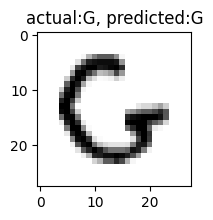

In [ ]:
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(28, 28), cmap='binary')
plt.title(f'actual:{classes[test_label]}, predicted:{classes[test_label_pred]}')